## PSI
Population Stability Index (PSI) is a statistical measure commonly used in credit risk modeling and other fields to assess the stability of a population across different time periods or segments. It's particularly valuable in scenarios where changes in the population distribution could impact the effectiveness of a model. It is a fundamental assumption that the population on which a statistical model is applied to is similar to the population on which the model is developed at. The model performance relies on the closeness between the model development sample and the production data. Therefore, there is an intrinsic need to compare the two samples (development vs production) and assess whether a model needs to be recalibrated. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def calculate_psi(reference, monitored, bins=10):
    # Combine datasets to get the overall range
    all_data = np.concatenate([reference, monitored])
    
    # Create bins
    bin_edges = np.histogram_bin_edges(all_data, bins=bins)
    
    # Calculate histograms
    hist_reference, _ = np.histogram(reference, bins=bin_edges)
    hist_monitored, _ = np.histogram(monitored, bins=bin_edges)
    
    # Calculate percentages
    pct_reference = hist_reference / len(reference)
    pct_monitored = hist_monitored / len(monitored)
    
    # Calculate PSI
    psi = np.sum((pct_monitored - pct_reference) * np.log(pct_monitored / pct_reference))
    
    return psi


In [3]:
np.random.seed(42)

# Reference dataset
reference_data = np.random.normal(loc=0, scale=1, size=1000)

# Monitored dataset (slightly shifted)
monitored_data = np.random.normal(loc=0.2, scale=1.1, size=1000)


In [4]:
psi_value = calculate_psi(reference_data, monitored_data)
print(f"Population Stability Index: {psi_value:.4f}")


Population Stability Index: 0.0865


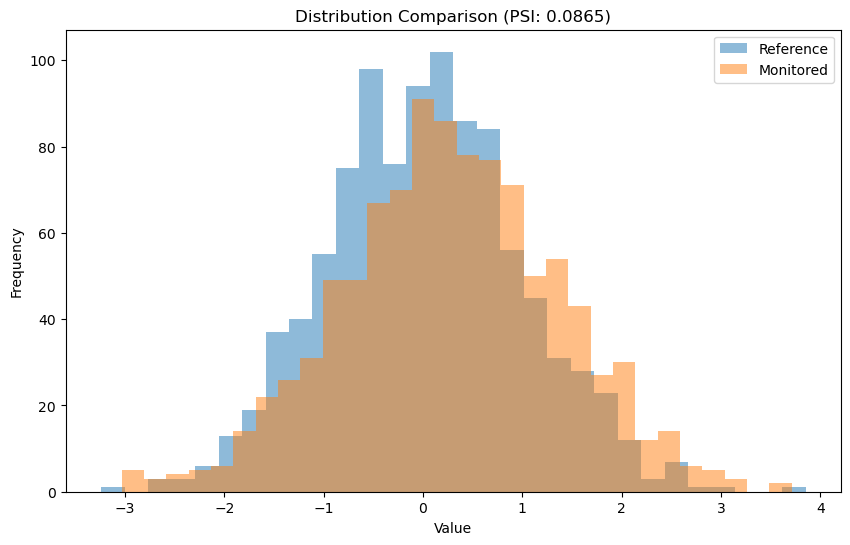

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(reference_data, bins=30, alpha=0.5, label='Reference')
plt.hist(monitored_data, bins=30, alpha=0.5, label='Monitored')
plt.title(f'Distribution Comparison (PSI: {psi_value:.4f})')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Interpreting the Results
The PSI value can be interpreted as follows:

- PSI < 0.1: No significant change in population
- 0.1 ≤ PSI < 0.2: Slight change in population
- PSI ≥ 0.2: Significant change in population

In this example, if the PSI value is less than 0.1, it indicates that the monitored dataset's distribution is similar to the reference dataset. If it's between 0.1 and 0.2, there's a slight change, and if it's 0.2 or greater, there's a significant change in the population distribution23.
This example demonstrates how to use the Population Stability Index to compare two datasets and assess the stability of a feature's distribution over time or between different populations. It's particularly useful in fields like credit scoring, customer behavior analysis, or any scenario where you need to monitor changes in data distributions